<a href="https://colab.research.google.com/github/NeguseNegest/ARIMA-and-LSTM-for-Wind-Speed-Time-Series-Forecasting/blob/main/ThesisProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data pre-proccesing


In [93]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.dates as mdates
import scipy
import sklearn


In [94]:
'''

#Kombinera filerna till en enda csv fil
files = [
    "/content/HelsingforsJanuaryTOFebraury29.csv",
    "/content/HelsingforsMarsTOApril.csv",
    "/content/HelsingforsMayTOJune.csv",
    "/content/HelsingforsJulyTOAgust.csv",
    "/content/HelsingforsSeptemberTOoctober.csv",
    "/content/HelsingforsNovemberTODecember.csv"
]

df_list = [pd.read_csv(f) for f in files]

combined_df = pd.concat(df_list, ignore_index=True)

combined_df.to_csv("combined.csv", index=False)


'''



'\n\n#Kombinera filerna till en enda csv fil\nfiles = [\n    "/content/HelsingforsJanuaryTOFebraury29.csv",\n    "/content/HelsingforsMarsTOApril.csv",\n    "/content/HelsingforsMayTOJune.csv",\n    "/content/HelsingforsJulyTOAgust.csv",\n    "/content/HelsingforsSeptemberTOoctober.csv",\n    "/content/HelsingforsNovemberTODecember.csv"\n]\n\ndf_list = [pd.read_csv(f) for f in files]\n\ncombined_df = pd.concat(df_list, ignore_index=True)\n\ncombined_df.to_csv("combined.csv", index=False)\n\n\n'

In [95]:
data=pd.read_csv('/Users/Hana/ARIMA-and-LSTM-for-Wind-Speed-Time-Series-Forecasting/combined.csv')
df=data.copy(deep=True)
df.head(1000)


Observationsstation    År  Månad  Dag Tid [Lokal tid]   
0    Helsingfors Kajsaniemi  2024      1    1           01:00  \
1    Helsingfors Kajsaniemi  2024      1    1           02:00   
2    Helsingfors Kajsaniemi  2024      1    1           03:00   
3    Helsingfors Kajsaniemi  2024      1    1           04:00   
4    Helsingfors Kajsaniemi  2024      1    1           05:00   
..                      ...   ...    ...  ...             ...   
995  Helsingfors Kajsaniemi  2024      2   11           12:00   
996  Helsingfors Kajsaniemi  2024      2   11           13:00   
997  Helsingfors Kajsaniemi  2024      2   11           14:00   
998  Helsingfors Kajsaniemi  2024      2   11           15:00   
999  Helsingfors Kajsaniemi  2024      2   11           16:00   

    Daggpunktstemperatur medelvärde [°C] Lufttemperatur medelvärde [°C]   
0                                  -16.2                          -14.2  \
1                                  -16.5                          -14.5   
2                                  -16.8                          -14.7   
3                                  -16.7                          -14.5   
4                                  -16.5                          -14.3   
..                                   ...                            ...   
995                                -17.1                           -9.5   
996                                -16.3                           -8.9   
997                                -15.7                           -8.5   
998                                -15.5                           -8.0   
999                                -15.4                           -7.4   

    Molnighet [1/8] Lufttryck medelvärde [hPa]   
0       Klart (0/8)                     1019.8  \
1       Klart (0/8)                     1020.1   
2       Klart (0/8)                     1020.3   
3       Klart (0/8)                     1020.3   
4       Klart (0/8)                     1020.5   
..              ...                        ...   
995     Mulet (8/8)                     1013.2   
996     Mulet (8/8)                     1012.9   
997     Mulet (8/8)                     1012.7   
998     Mulet (8/8)                     1012.6   
999     Mulet (8/8)                     1012.0   

    Relativ luftfuktighet medelvärde [%] Nederbördsmängd medelvärde [mm]   
0                                   84.5                             0.0  \
1                                   84.4                             0.0   
2                                   83.9                             0.0   
3                                   84.0                             0.0   
4                                   83.6                             0.0   
..                                   ...                             ...   
995                                 54.1                             0.0   
996                                 55.2                             0.0   
997                                 55.8                             0.0   
998                                 54.8                             0.0   
999                                 52.7                             0.0   

    Snödjup medelvärde [cm] Vindriktning medelvärde [°]   
0                        21                        20.7  \
1                        21                        33.4   
2                        21                        35.6   
3                        21                          47   
4                        21                        46.9   
..                      ...                         ...   
995                      23                        57.4   
996                      23                        60.5   
997                    22.9                        62.2   
998                      23                        60.1   
999                      23                        58.9   

    Byvindshastighet medelvärde [m/s] Vindhastighet medelvärde [m/s]  
0                               

In [96]:
'''Få info om data'''

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8639 entries, 0 to 8638
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Observationsstation                   8639 non-null   object
 1   År                                    8639 non-null   int64 
 2   Månad                                 8639 non-null   int64 
 3   Dag                                   8639 non-null   int64 
 4   Tid [Lokal tid]                       8639 non-null   object
 5   Daggpunktstemperatur medelvärde [°C]  8639 non-null   object
 6   Lufttemperatur medelvärde [°C]        8639 non-null   object
 7   Molnighet [1/8]                       8639 non-null   object
 8   Lufttryck medelvärde [hPa]            8639 non-null   object
 9   Relativ luftfuktighet medelvärde [%]  8639 non-null   object
 10  Nederbördsmängd medelvärde [mm]       8639 non-null   object
 11  Snödjup medelvärde [cm]       

In [97]:
'''Molnighet kolumnen har ett enda NaN värde, vi tar bort denna.'''

df = df[df['Molnighet [1/8]'] != '-']
df['Molnighet [1/8]'].unique()




array(['Klart (0/8)', 'Halv klart (5/8)', 'Mulet (8/8)', 'Klart (1/8)',
       'Mest klart (2/8)', 'Molnigt (7/8)', 'Halv klart (4/8)',
       'Molnigt (6/8)', 'Molnigheten kan inte fastställas (9/8)',
       'Mest klart (3/8)'], dtype=object)

In [98]:

#ta bort strängen framför siffran före *

df['Molnighet [1/8]'] = df['Molnighet [1/8]'].astype(str).str.extract(r'(\d+)/\d+')


In [99]:

df['Molnighet [1/8]'] = pd.to_numeric(df['Molnighet [1/8]'], errors='coerce').astype('float')


# Konvertera till tid format
df['Datum'] = pd.to_datetime(
    df[['År', 'Månad', 'Dag']].astype(str).agg('-'.join, axis=1) + " " + df['Tid [Lokal tid]'],
    format='%Y-%m-%d %H:%M'
)
#konvertera snödjup, horisontell sikt,vindriktning,byvindshastigheten,vindhastigheten till float  från object
# För att konvertera alla object-kolumner till numeriska värden (utom 'Tid [Lokal tid]')
object_cols = df.select_dtypes(include='object').columns.tolist()
if 'Tid [Lokal tid]' in object_cols:
    object_cols.remove('Tid [Lokal tid]')
if 'Datum' in object_cols:
  object_cols.remove('Datum')
for col in object_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.drop(columns=['Observationsstation'], inplace=True, errors='ignore')

df['Tid [Lokal tid]']


0       01:00
1       02:00
2       03:00
3       04:00
4       05:00
        ...  
8634    20:00
8635    21:00
8636    22:00
8637    23:00
8638    00:00
Name: Tid [Lokal tid], Length: 8638, dtype: object

# Clean the data. We have several columns with NaN values. Should we replace them with the mean of the column or drop them entirely?

In [100]:
for column in list(df.columns):
  print(f'Column {column} has  {(df[column].isna().sum())}  NaN values \n')

Column År has  0  NaN values 

Column Månad has  0  NaN values 

Column Dag has  0  NaN values 

Column Tid [Lokal tid] has  0  NaN values 

Column Daggpunktstemperatur medelvärde [°C] has  2  NaN values 

Column Lufttemperatur medelvärde [°C] has  2  NaN values 

Column Molnighet [1/8] has  0  NaN values 

Column Lufttryck medelvärde [hPa] has  2  NaN values 

Column Relativ luftfuktighet medelvärde [%] has  2  NaN values 

Column Nederbördsmängd medelvärde [mm] has  4  NaN values 

Column Snödjup medelvärde [cm] has  501  NaN values 

Column Vindriktning medelvärde [°] has  84  NaN values 

Column Byvindshastighet medelvärde [m/s] has  84  NaN values 

Column Vindhastighet medelvärde [m/s] has  84  NaN values 

Column Datum has  0  NaN values 



In [101]:
''' We replace the NaN values with the column mean for the specific feature'''


numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    if df[col].isna().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)

for column in df.columns:
    print(f'Column {column} has {df[column].isna().sum()} NaN values')


Column År has 0 NaN values
Column Månad has 0 NaN values
Column Dag has 0 NaN values
Column Tid [Lokal tid] has 0 NaN values
Column Daggpunktstemperatur medelvärde [°C] has 0 NaN values
Column Lufttemperatur medelvärde [°C] has 0 NaN values
Column Molnighet [1/8] has 0 NaN values
Column Lufttryck medelvärde [hPa] has 0 NaN values
Column Relativ luftfuktighet medelvärde [%] has 0 NaN values
Column Nederbördsmängd medelvärde [mm] has 0 NaN values
Column Snödjup medelvärde [cm] has 0 NaN values
Column Vindriktning medelvärde [°] has 0 NaN values
Column Byvindshastighet medelvärde [m/s] has 0 NaN values
Column Vindhastighet medelvärde [m/s] has 0 NaN values
Column Datum has 0 NaN values


# We divide Tid [Lokal tid]  into 'time' and 'hour'

In [102]:

df['Tid [Lokal tid]'] = pd.to_datetime(df['Tid [Lokal tid]'], format='%H:%M')

df['Hour_of_day'] = df['Tid [Lokal tid]'].dt.hour


# Vi tar bort tid kolumnen nu: Tid[Lokal tid]
df=df.drop(['Tid [Lokal tid]'],axis=1)

df['Hour_of_day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23,  0], dtype=int32)

## We would like to create new columns that store the observations at t+1 for each non-categorical value.

In [103]:


features_to_shift = [
    "Daggpunktstemperatur medelvärde [°C]",
    "Lufttemperatur medelvärde [°C]",
    "Lufttryck medelvärde [hPa]",
    "Relativ luftfuktighet medelvärde [%]",
    "Nederbördsmängd medelvärde [mm]",
    "Snödjup medelvärde [cm]",
    "Vindriktning medelvärde [°]",
    "Byvindshastighet medelvärde [m/s]",
    "Vindhastighet medelvärde [m/s]",
    'Molnighet [1/8]'

]

df[features_to_shift] = df[features_to_shift].apply(pd.to_numeric, errors='coerce')

for feature in features_to_shift:
    df[f"{feature} for t+1"] = df[feature].shift(-1)

df = df.iloc[:-1]

df.head(1000)

År  Månad  Dag  Daggpunktstemperatur medelvärde [°C]   
0    2024      1    1                                 -16.2  \
1    2024      1    1                                 -16.5   
2    2024      1    1                                 -16.8   
3    2024      1    1                                 -16.7   
4    2024      1    1                                 -16.5   
..    ...    ...  ...                                   ...   
995  2024      2   11                                 -17.1   
996  2024      2   11                                 -16.3   
997  2024      2   11                                 -15.7   
998  2024      2   11                                 -15.5   
999  2024      2   11                                 -15.4   

     Lufttemperatur medelvärde [°C]  Molnighet [1/8]   
0                             -14.2              0.0  \
1                             -14.5              0.0   
2                             -14.7              0.0   
3                             -14.5              0.0   
4                             -14.3              0.0   
..                              ...              ...   
995                            -9.5              8.0   
996                            -8.9              8.0   
997                            -8.5              8.0   
998                            -8.0              8.0   
999                            -7.4              8.0   

     Lufttryck medelvärde [hPa]  Relativ luftfuktighet medelvärde [%]   
0                        1019.8                                  84.5  \
1                        1020.1                                  84.4   
2                        1020.3                                  83.9   
3                        1020.3                                  84.0   
4                        1020.5                                  83.6   
..                          ...                                   ...   
995                      1013.2                                  54.1   
996                      1012.9                                  55.2   
997                      1012.7                                  55.8   
998                      1012.6                                  54.8   
999                      1012.0                                  52.7   

     Nederbördsmängd medelvärde [mm]  Snödjup medelvärde [cm]  ...   
0                                0.0                     21.0  ...  \
1                                0.0                     21.0  ...   
2                                0.0                     21.0  ...   
3                                0.0                     21.0  ...   
4                                0.0                     21.0  ...   
..                               ...                      ...  ...   
995                              0.0                     23.0  ...   
996                              0.0                     23.0  ...   
997                              0.0                     22.9  ...   
998                              0.0                     23.0  ...   
999                              0.0                     23.0  ...   

     Daggpunktstemperatur medelvärde [°C] for t+1   
0                                           -16.5  \
1                                           -16.8   
2                                           -16.7   
3                                           -16.5   
4                                           -16.4   
..                                            ...   
995                                         -16.3   
996                                         -15.7   
997                                         -15.5   
998                                         -15.4   
999                                         -15.1   

     Lufttemperatur medelvärde [°C] for t+1   
0                                     -14.5  \
1                                     -14.7   
2                                     -14.5   
3                                 

In [104]:
df['Vindhastighet medelvärde [m/s] for t+1'].describe()

count    8637.000000
mean        3.785559
std         1.754172
min         0.000000
25%         2.500000
50%         3.600000
75%         4.800000
max        14.600000
Name: Vindhastighet medelvärde [m/s] for t+1, dtype: float64

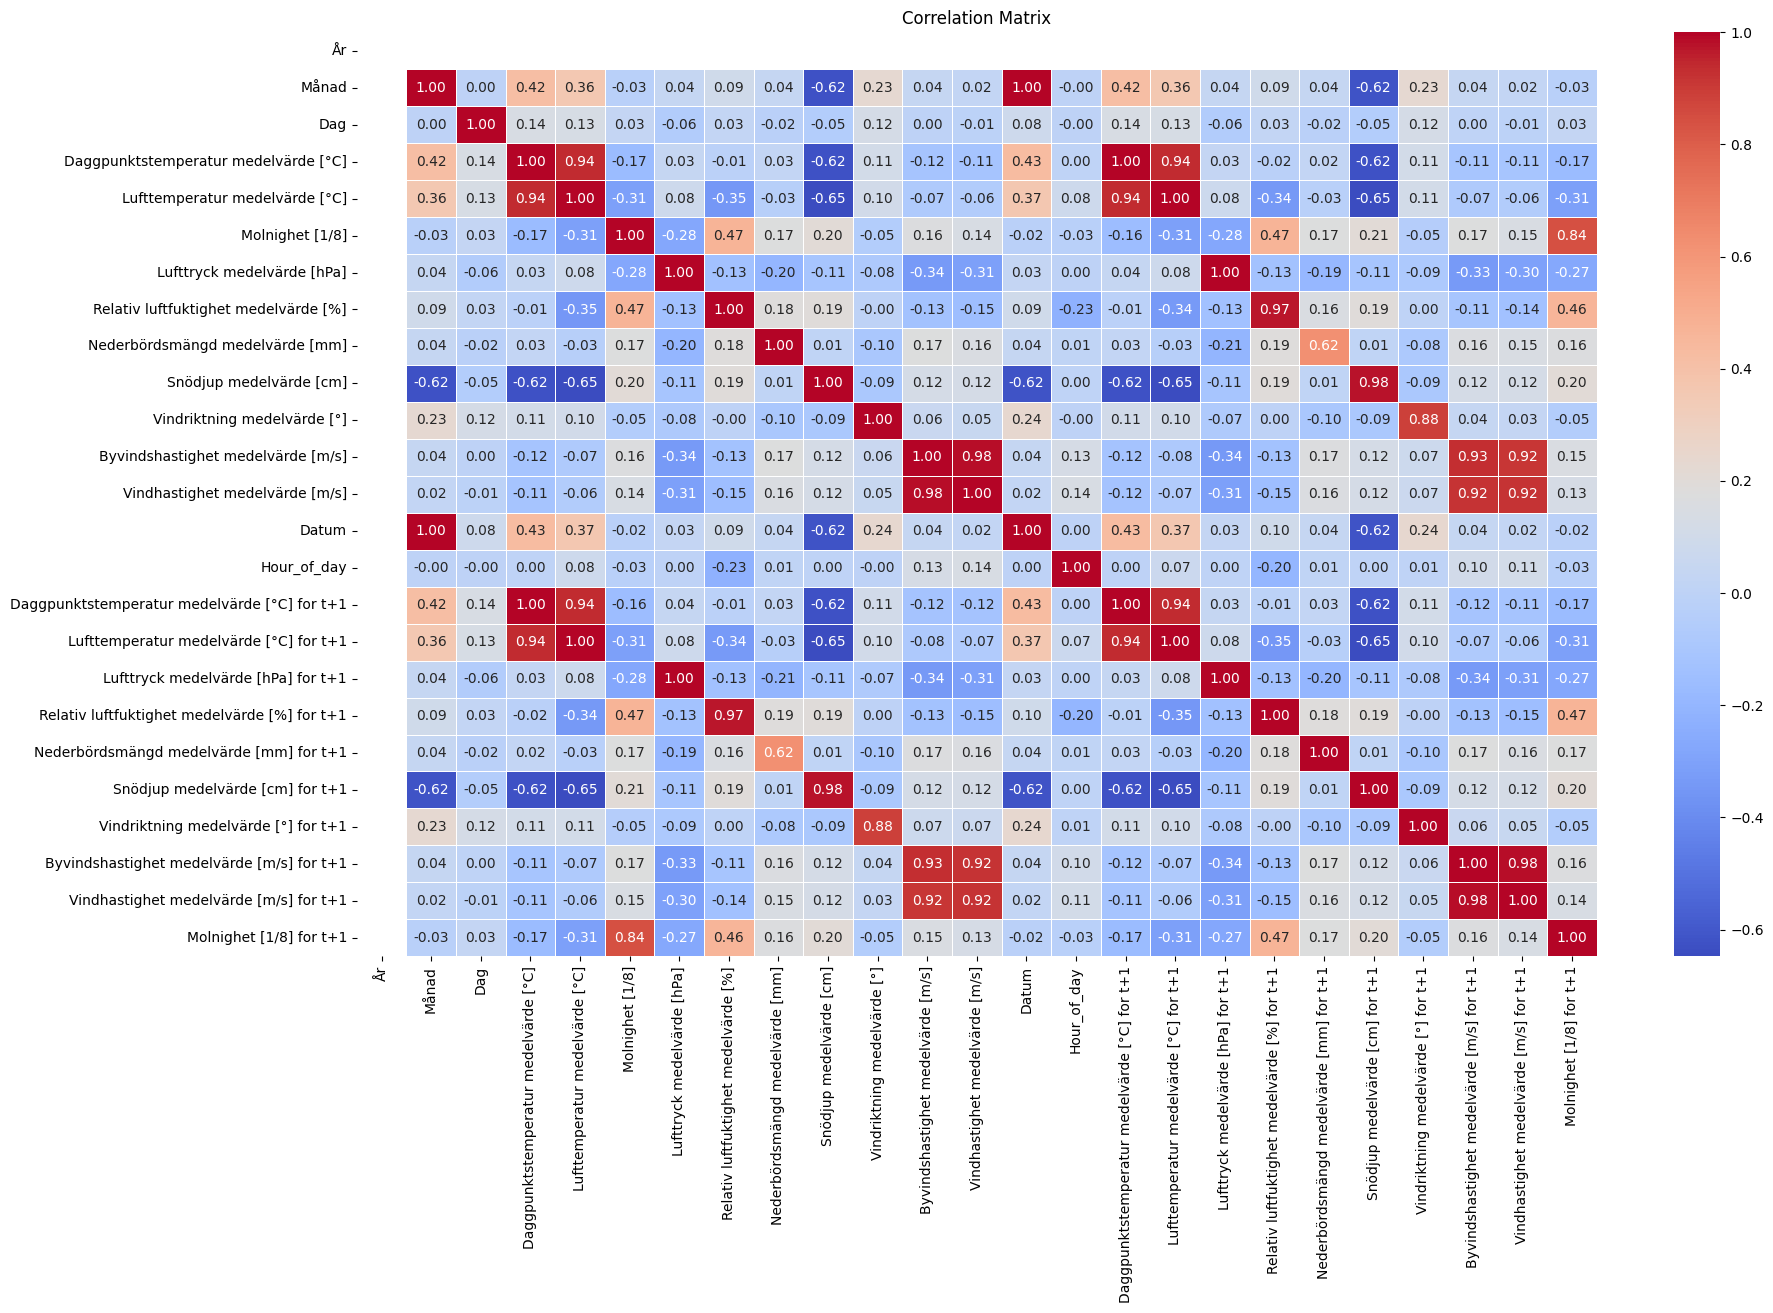

In [105]:
corr_matrix = df.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

## Normalize every non-catagorical feature so that they have mean 0 and variance 1

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8637 entries, 0 to 8637
Data columns (total 25 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   År                                            8637 non-null   int64         
 1   Månad                                         8637 non-null   int64         
 2   Dag                                           8637 non-null   int64         
 3   Daggpunktstemperatur medelvärde [°C]          8637 non-null   float64       
 4   Lufttemperatur medelvärde [°C]                8637 non-null   float64       
 5   Molnighet [1/8]                               8637 non-null   float64       
 6   Lufttryck medelvärde [hPa]                    8637 non-null   float64       
 7   Relativ luftfuktighet medelvärde [%]          8637 non-null   float64       
 8   Nederbördsmängd medelvärde [mm]               8637 non-null   float64    

In [107]:
"""columns_to_exclude = ["Observationsstation", "År", "Månad", "Dag", "Hour_of_day",'Datum','Vindshastighet medelvärde [m/s] for t+1']
#,"Vindhastighet medelvärde [m/s] for t+1"

numerical_cols = [col for col in df.columns if col not in columns_to_exclude]

scaler = StandardScaler()

df[numerical_cols]=scaler.fit_transform(df[numerical_cols])"""


'columns_to_exclude = ["Observationsstation", "År", "Månad", "Dag", "Hour_of_day",\'Datum\',\'Vindshastighet medelvärde [m/s] for t+1\']\n#,"Vindhastighet medelvärde [m/s] for t+1"\n\nnumerical_cols = [col for col in df.columns if col not in columns_to_exclude]\n\nscaler = StandardScaler()\n\ndf[numerical_cols]=scaler.fit_transform(df[numerical_cols])'

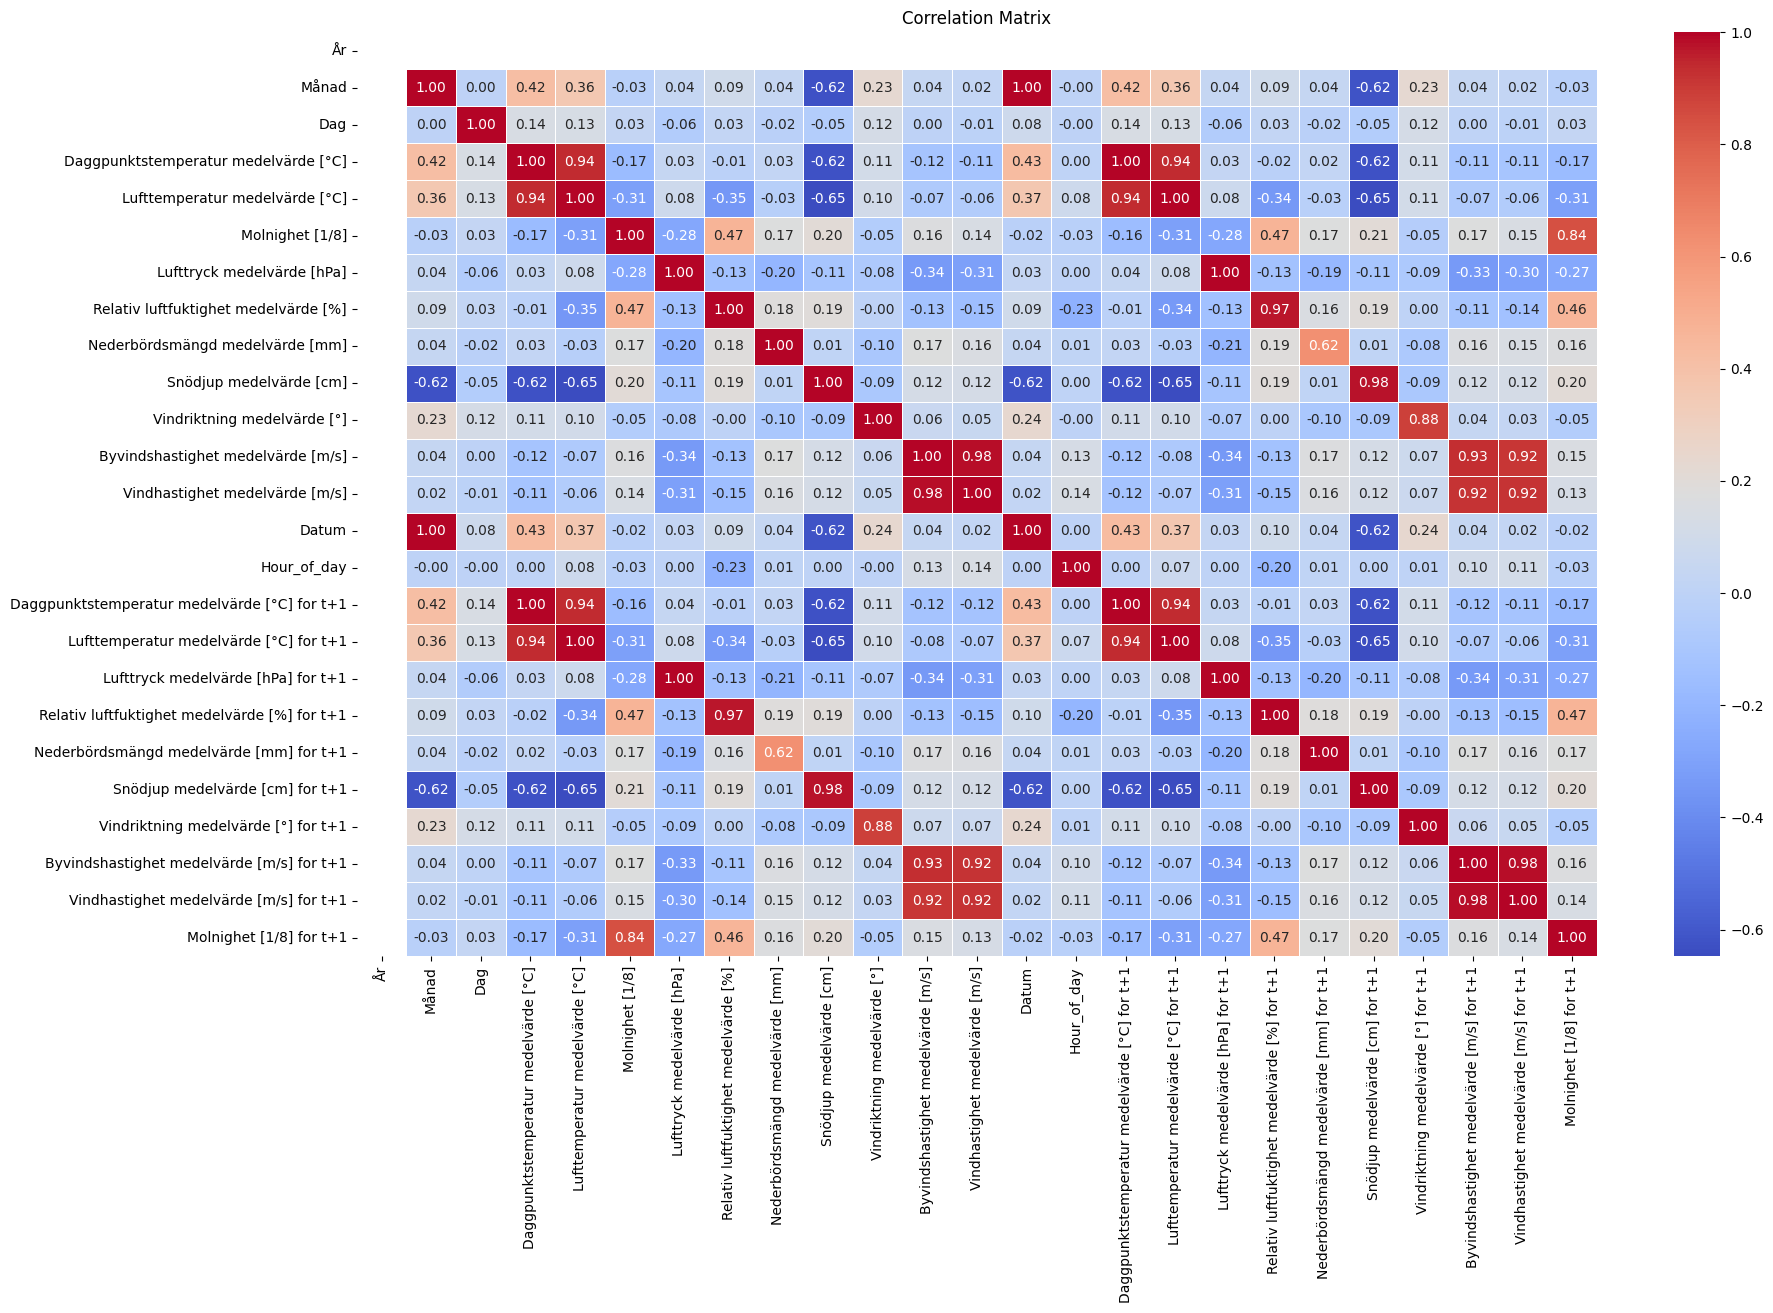

In [108]:
corr_matrix = df.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# **Regression analysis**. We start with doing a simple regression using LinearRegression(). After this we try both the Ridge and Lasso regression to determine which provides the best fit. We have multicollinearity in our dataset and i suspect that Ridge regression will be best suited here.

In [109]:
feature_cols = [
    "Månad",
    "Dag",
    "Daggpunktstemperatur medelvärde [°C]",
    "Hour_of_day",
    "Lufttemperatur medelvärde [°C]",
    "Molnighet [1/8]",
    "Lufttryck medelvärde [hPa]",
    "Relativ luftfuktighet medelvärde [%]",
    "Nederbördsmängd medelvärde [mm]",
    "Snödjup medelvärde [cm]",
    "Byvindshastighet medelvärde [m/s]",
    "Vindriktning medelvärde [°]",





]


#Vår beroende variabel är vindhastighet
target_col = "Vindhastighet medelvärde [m/s] for t+1"

train_size = int(len(df) * 0.8) #80% data använder vi för träning

df_train = df.iloc[:train_size].copy()
df_test = df.iloc[train_size:].copy()



X_train = df_train[feature_cols]
y_train = df_train[target_col]

X_test = df_test[feature_cols]
y_test = df_test[target_col]

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)



y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression (time-series) error results:")
print(f"  RMSE: {rmse:.3f}")
print(f"  MAE : {mae:.3f}")
print(f"  R^2 : {r2:.3f} \n")




coef_dict = {
    "Feature": feature_cols,
    "Coefficient": lr_model.coef_
}
coef_df = pd.DataFrame(coef_dict)
coef_df["Absolute Coef"] = coef_df["Coefficient"].abs()
coef_df = coef_df.sort_values("Absolute Coef", ascending=False)
print('The following are the coefficients in the function:')

#display(Math(r'Y = \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + \dots + \beta_i \cdot x_i'))
print(coef_df)


plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
#plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Wind Speed")
plt.ylabel("Predicted Wind Speed")
plt.title("LinearRegression(): Actual vs. Predicted")
plt.show()


Linear Regression (time-series) error results:
  RMSE: 0.786
  MAE : 0.591
  R^2 : 0.830 

The following are the coefficients in the function:
                                 Feature  Coefficient  Absolute Coef
10     Byvindshastighet medelvärde [m/s]     0.546021       0.546021
8        Nederbördsmängd medelvärde [mm]    -0.159988       0.159988
2   Daggpunktstemperatur medelvärde [°C]     0.034032       0.034032
0                                  Månad    -0.025731       0.025731
4         Lufttemperatur medelvärde [°C]    -0.024432       0.024432
7   Relativ luftfuktighet medelvärde [%]    -0.009687       0.009687
5                        Molnighet [1/8]     0.006493       0.006493
3                            Hour_of_day    -0.004946       0.004946
9                Snödjup medelvärde [cm]     0.002264       0.002264
1                                    Dag    -0.001239       0.001239
6             Lufttryck medelvärde [hPa]     0.001135       0.001135
11           Vindriktning med

## Wind speed vs actual speed over time(in this case we use the row index)



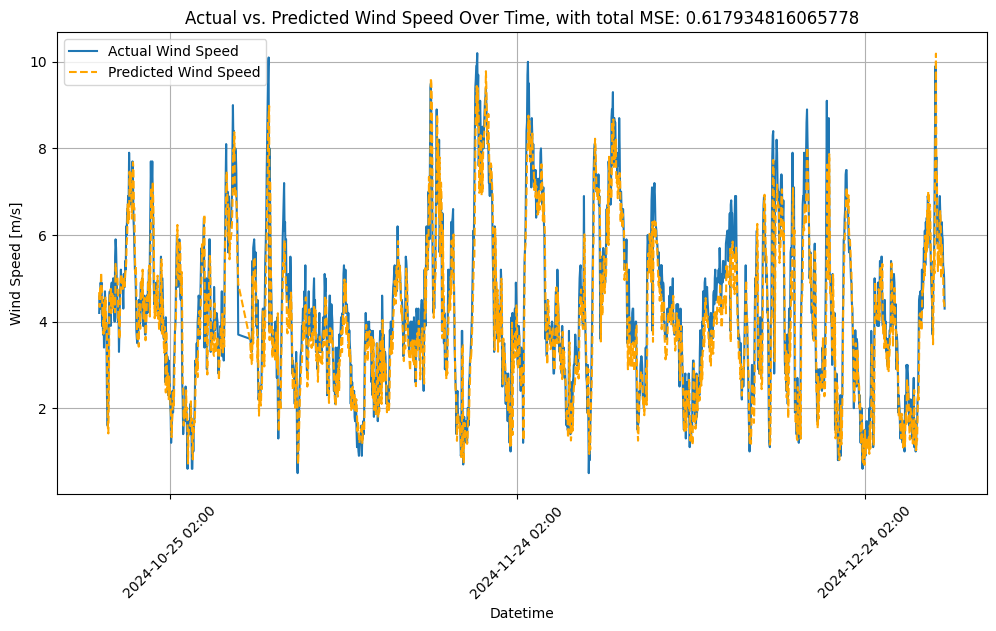

0.591273130353954


In [110]:
error=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
plt.figure(figsize=(12, 6))
plt.plot(df_test['Datum'], y_test, label="Actual Wind Speed", linestyle="-")
plt.plot(df_test['Datum'], y_pred, label="Predicted Wind Speed", linestyle="--", color="orange")

plt.xlabel("Datetime")
plt.ylabel("Wind Speed [m/s]")
plt.title(f"Actual vs. Predicted Wind Speed Over Time, with total MSE: {error}")
plt.legend()

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=720))  # Show every 720h
plt.xticks(rotation=45)

plt.grid(True)
plt.show()
print(mae)

## MSE and R^2 error over time


In [111]:
df['Byvindshastighet medelvärde [m/s] for t+1'].mean()

6.154973435758726

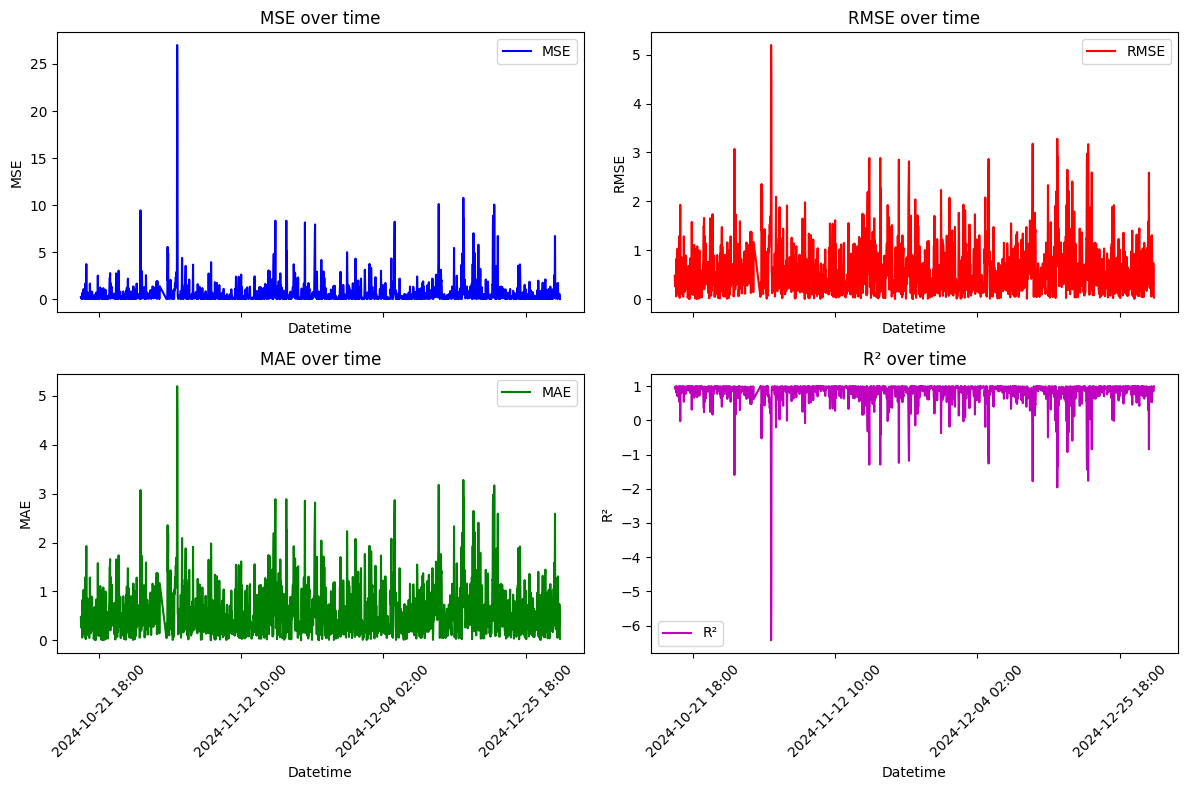

In [112]:


mse_series = (y_test - y_pred) ** 2
rmse_series = np.sqrt(mse_series)
mae_series = np.abs(y_test - y_pred)
r2_series = 1 - (mse_series / np.var(y_test))
residual = y_test - y_pred

fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True)

time_index = df_test['Datum']

# MSE Plot
axs[0, 0].plot(time_index, mse_series, label="MSE", color="b")
axs[0, 0].set_title('MSE over time')
axs[0, 0].set_ylabel('MSE')
axs[0, 0].legend()

# RMSE Plot
axs[0, 1].plot(time_index, rmse_series, label="RMSE", color="r")
axs[0, 1].set_title('RMSE over time')
axs[0, 1].set_ylabel('RMSE')
axs[0, 1].legend()

# MAE Plot
axs[1, 0].plot(time_index, mae_series, label="MAE", color="g")
axs[1, 0].set_title('MAE over time')
axs[1, 0].set_ylabel('MAE')
axs[1, 0].legend()

# R² Plot
axs[1, 1].plot(time_index, r2_series, label="R²", color="m")
axs[1, 1].set_title('R² over time')
axs[1, 1].set_ylabel('R²')
axs[1, 1].legend()

for ax in axs.flatten():
    ax.set_xlabel('Datetime')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=520))
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Residual Plot
plt.figure(figsize=(10, 5))
plt.plot(time_index, residual, label="Residual over time", linestyle="--", color="purple")
plt.xlabel("Datetime")
plt.ylabel("Residual")
plt.title("Residual between Predicted and Actual Wind Speed Over Time")
plt.legend()

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=520))
plt.xticks(rotation=45)

plt.grid(True)
plt.show()


# **RIDGE-Regression**  We are to minimize the following :\begin{equation} \text{Error}=
\sum_{i=1}^n\left(y_i-\hat{y}_i(\mathbf{w})\right)^2 \quad+\lambda \sum_{j=1}^d w_j^2 .
\end{equation}
\\
Where $w_i$ are the weights. $\lambda$ is to be choosen so we get the best fit. With hyperparemter tuning

Best alpha for Ridge: {'alpha': 101}
Best Ridge MSE: 0.6178878586873232
Best Ridge R^2: 0.8300406825177686
Best Ridge MAE 0.5910435008978111


Byvindshastighet medelvärde [m/s]       0.544226
Daggpunktstemperatur medelvärde [°C]    0.033350
Molnighet [1/8]                         0.006546
Snödjup medelvärde [cm]                 0.002400
Lufttryck medelvärde [hPa]              0.001093
Vindriktning medelvärde [°]            -0.000436
Dag                                    -0.001224
Hour_of_day                            -0.004961
Relativ luftfuktighet medelvärde [%]   -0.009728
Lufttemperatur medelvärde [°C]         -0.023825
Månad                                  -0.025473
Nederbördsmängd medelvärde [mm]        -0.033020
dtype: float64


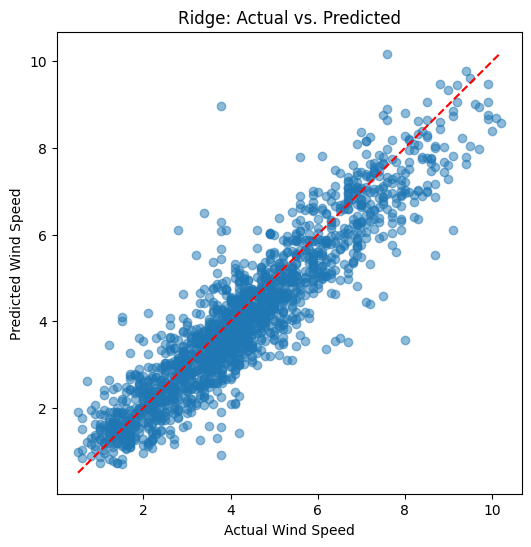

In [113]:

param_grid = {
    'alpha': [88,90,91,93,95,97,97,98,99,100.0,101]
}
ridge_reg = Ridge()
grid_search_ridge = GridSearchCV(ridge_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)

print("Best alpha for Ridge:", grid_search_ridge.best_params_)
best_ridge_model = grid_search_ridge.best_estimator_

y_pred_best_ridge = best_ridge_model.predict(X_test)
rmse_best_ridge = (mean_squared_error(y_test, y_pred_best_ridge))
r2_best_ridge = r2_score(y_test, y_pred_best_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_best_ridge)

coeffs_ridge = pd.Series(best_ridge_model.coef_, index=feature_cols).sort_values(ascending=False)


print("Best Ridge MSE:", rmse_best_ridge)
print("Best Ridge R^2:", r2_best_ridge)
print('Best Ridge MAE',mae_ridge)
print('\n')
print(coeffs_ridge)


y_pred_best_ridge = best_ridge_model.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_best_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Wind Speed")
plt.ylabel("Predicted Wind Speed")
plt.title("Ridge: Actual vs. Predicted")
plt.show()


# **LASSO REGRESSION** We are to minimize the following:
$$
\sum_{i=1}^n\left(y_i-\hat{y}_i(\mathbf{w})\right)^2 \quad+\lambda \sum_{j=1}^d |w_j| .
$$

# The Lasso regression finds the least relevant features and set their weights to 0. (Reduces dimensionality)

In [114]:
values = [x for x in np.arange(0.0, 100, 0.5)]

alpha_val={'alpha':[0.001, 0.01, 0.1, 1.0, 10.0,100,101]}

lasso_regression=Lasso()

grid_search_lasso = GridSearchCV(lasso_regression,alpha_val, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)

print("Best alpha for Lasso:", grid_search_lasso.best_params_)
best_lasso_model = grid_search_lasso.best_estimator_

y_pred_best_lasso = best_lasso_model.predict(X_test)
mean_sq_error = mean_squared_error(y_test,y_pred_best_lasso) #np.sqrt(mean_squared_error(y_test, y_pred_best_lasso))
r2_best_lasso = r2_score(y_test, y_pred_best_lasso)
mae = mean_absolute_error(y_test, y_pred_best_lasso)
coeffs = pd.Series(best_lasso_model.coef_, index=feature_cols).sort_values(ascending=False)

print("Best Lasso MSE:", mean_sq_error)
print("Best Lasso R^2:", r2_best_lasso)
print(f'Best Lasso MAE:{mae} \n')
print(coeffs)




plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_best_lasso, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Wind Speed")
plt.ylabel("Predicted Wind Speed")
plt.title("Lasso: Actual vs. Predicted")
plt.show()



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.760e+01, tolerance: 1.593e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.024e+01, tolerance: 1.685e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

Best alpha for Lasso: {'alpha': 0.01}
Best Lasso MSE: 0.5993484259241488
Best Lasso R^2: 0.8351402313997145
Best Lasso MAE:0.5805053717516108 

Byvindshastighet medelvärde [m/s]       0.544017
Daggpunktstemperatur medelvärde [°C]    0.007512
Molnighet [1/8]                         0.004790
Snödjup medelvärde [cm]                 0.002568
Lufttryck medelvärde [hPa]              0.000615
Lufttemperatur medelvärde [°C]          0.000000
Nederbördsmängd medelvärde [mm]        -0.000000
Vindriktning medelvärde [°]            -0.000453
Dag                                    -0.000902
Relativ luftfuktighet medelvärde [%]   -0.004228
Hour_of_day                            -0.004634
Månad                                  -0.019805
dtype: float64


In [115]:

df.info()
df['Vindhastighet medelvärde [m/s] for t+1'].unique()

<class 'pandas.core.frame.DataFrame'>
Index: 8637 entries, 0 to 8637
Data columns (total 25 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   År                                            8637 non-null   int64         
 1   Månad                                         8637 non-null   int64         
 2   Dag                                           8637 non-null   int64         
 3   Daggpunktstemperatur medelvärde [°C]          8637 non-null   float64       
 4   Lufttemperatur medelvärde [°C]                8637 non-null   float64       
 5   Molnighet [1/8]                               8637 non-null   float64       
 6   Lufttryck medelvärde [hPa]                    8637 non-null   float64       
 7   Relativ luftfuktighet medelvärde [%]          8637 non-null   float64       
 8   Nederbördsmängd medelvärde [mm]               8637 non-null   float64    

array([ 2.6       ,  3.        ,  2.4       ,  2.7       ,  3.2       ,
        3.9       ,  3.6       ,  3.7       ,  4.        ,  4.7       ,
        3.78537526,  4.2       ,  4.4       ,  4.3       ,  5.2       ,
        5.9       ,  5.3       ,  5.1       ,  4.6       ,  4.9       ,
        5.4       ,  5.        ,  4.5       ,  5.6       ,  4.1       ,
        2.8       ,  3.1       ,  3.3       ,  3.5       ,  6.        ,
        6.3       ,  7.2       ,  4.8       ,  5.8       ,  5.5       ,
        6.5       ,  6.1       ,  5.7       ,  6.4       ,  6.8       ,
        2.5       ,  1.6       ,  1.9       ,  1.7       ,  1.4       ,
        1.3       ,  1.5       ,  0.9       ,  1.        ,  1.2       ,
        1.8       ,  2.3       ,  2.9       ,  3.4       ,  3.8       ,
        6.6       ,  6.2       ,  6.7       ,  7.        ,  6.9       ,
        7.1       ,  8.5       ,  8.9       ,  7.3       ,  0.7       ,
        0.8       ,  8.        ,  8.4       ,  7.4       ,  2.2 

## Arima implementation. I will first implement the AFC and PACF concepts.
# AFC first


In [116]:
df['Hour_of_day']

0        1
1        2
2        3
3        4
4        5
        ..
8633    19
8634    20
8635    21
8636    22
8637    23
Name: Hour_of_day, Length: 8637, dtype: int32

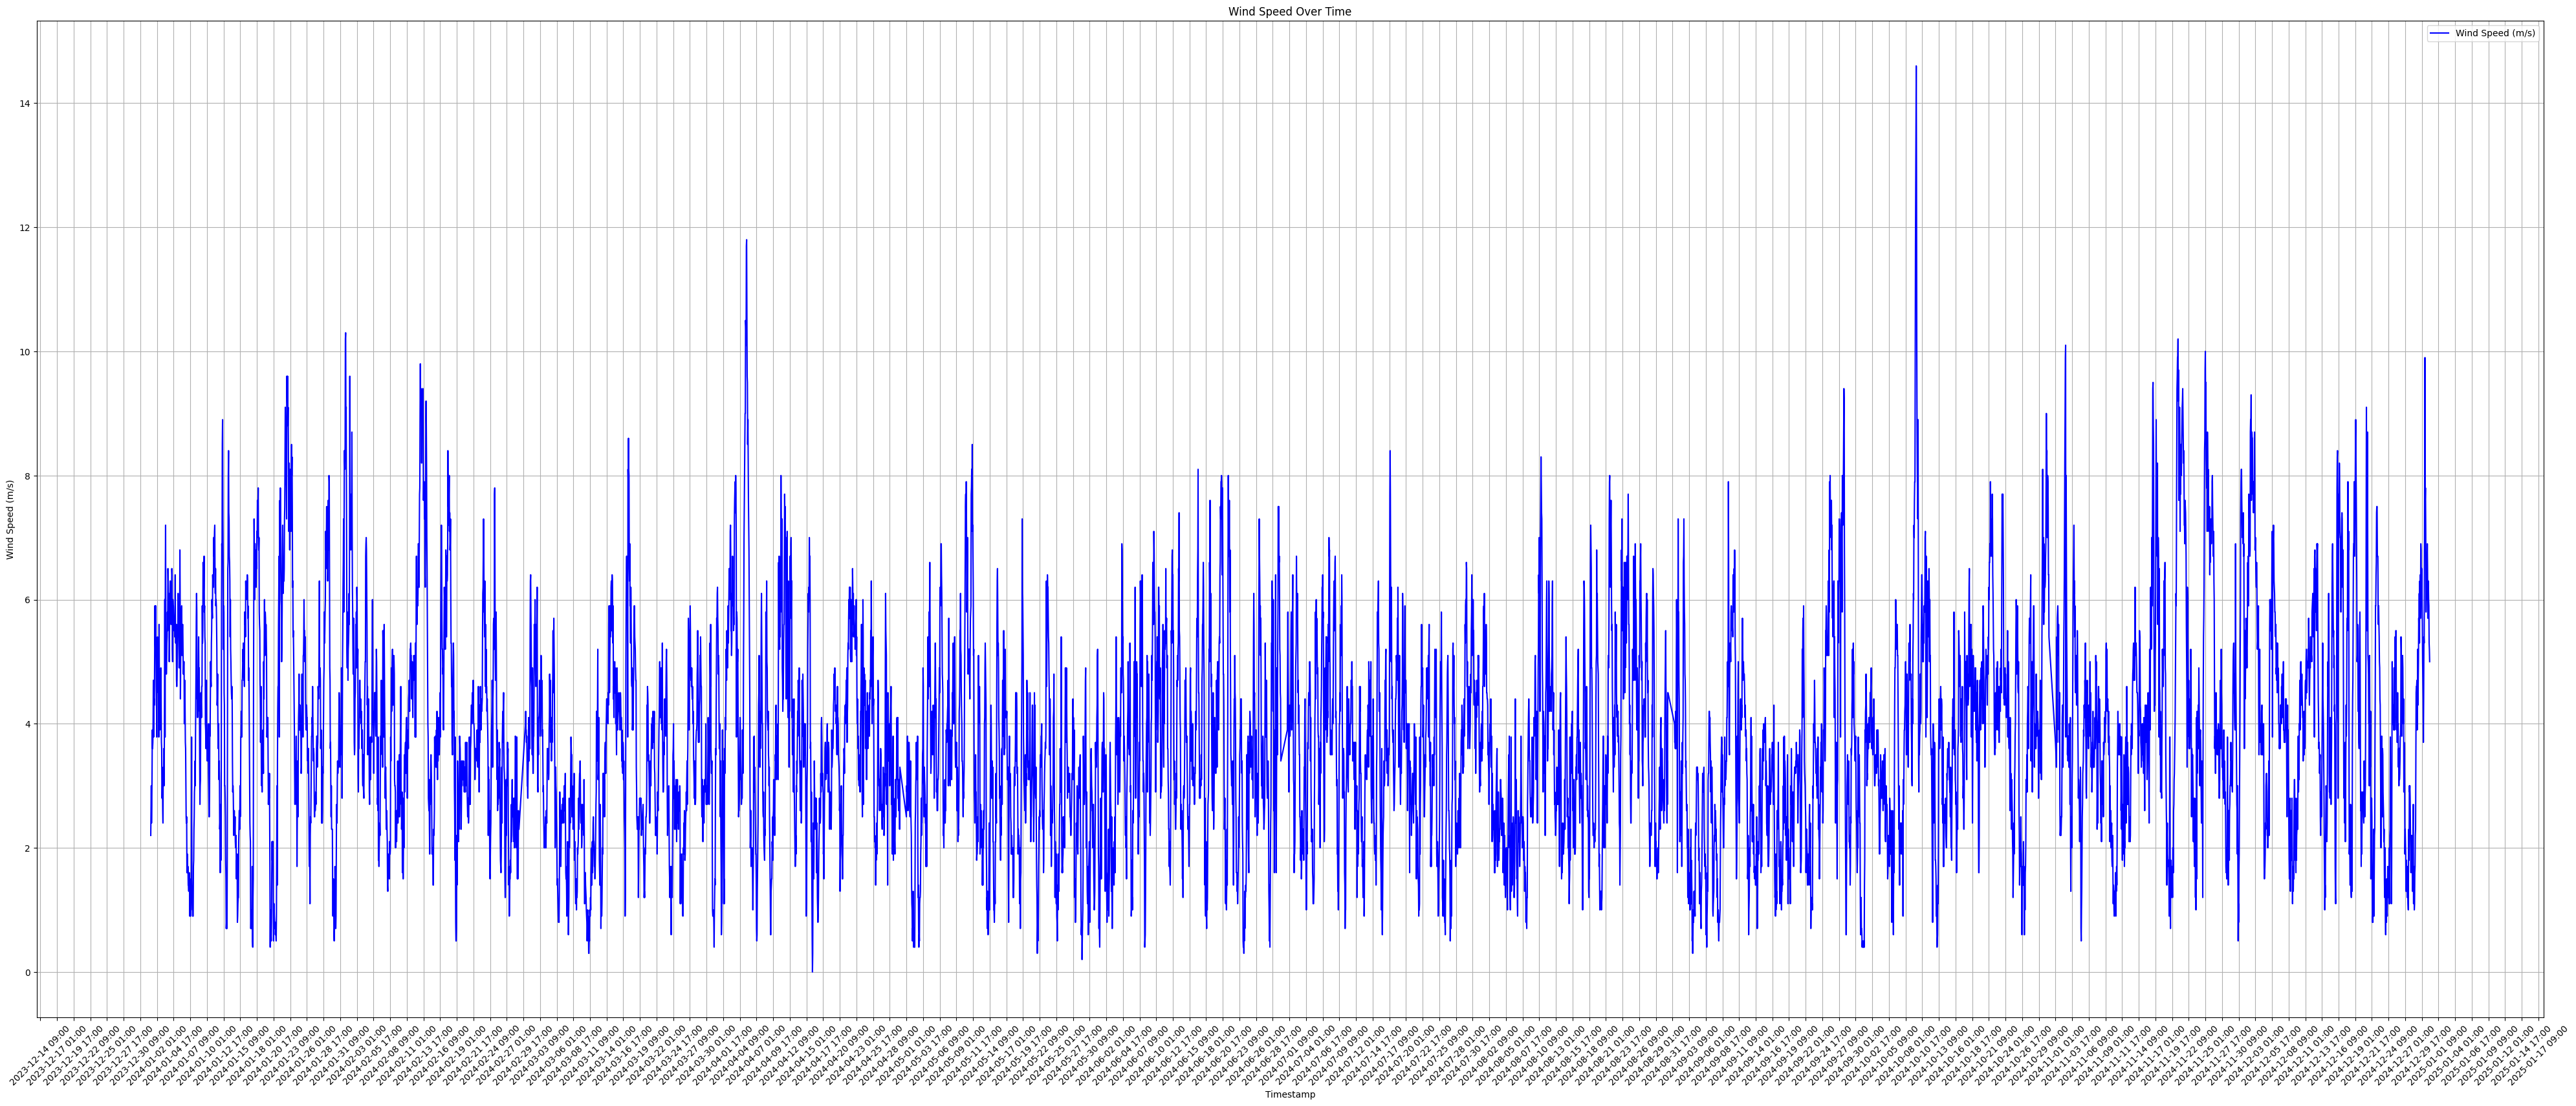

In [117]:


plt.figure(figsize=(50, 20))

date_format = 'Datum'

plt.plot(df[date_format], df['Vindhastighet medelvärde [m/s]'], label='Wind Speed (m/s)', color='b')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=64))

plt.xlabel('Timestamp')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()


In [118]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

wind_speed_series = df['Vindhastighet medelvärde [m/s] for t+1'].dropna()

adf_test = adfuller(wind_speed_series)

print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])


if adf_test[1] < 0.05:
    print("The series is stationary (p < 0.05)")
else:
    print("The series is NOT stationary (p >= 0.05), consider differencing")


ADF Statistic: -12.991809767978898
p-value: 2.8023385335450013e-24
The series is stationary (p < 0.05)


In [119]:
df['Datum']

0      2024-01-01 01:00:00
1      2024-01-01 02:00:00
2      2024-01-01 03:00:00
3      2024-01-01 04:00:00
4      2024-01-01 05:00:00
               ...        
8633   2024-12-30 19:00:00
8634   2024-12-30 20:00:00
8635   2024-12-30 21:00:00
8636   2024-12-30 22:00:00
8637   2024-12-30 23:00:00
Name: Datum, Length: 8637, dtype: datetime64[ns]

In [120]:
len(df['Datum'].unique())

8637

#PACF and ACF

$$Y_t=X_{t-1}+X_{t-2}$$

In [121]:


fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sm.graphics.tsa.plot_acf(df['Vindhastighet medelvärde [m/s] for t+1'], lags=100, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

sm.graphics.tsa.plot_pacf(df['Vindhastighet medelvärde [m/s] for t+1'], lags=100, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.show()


## See unique dates in the datum column. We need this information for the task down below.

In [122]:
df_april_dates = df.loc[df['Datum'].dt.month == 4, 'Datum']
print(df_april_dates.unique())
print('April dates')
print('-'*60,'\n')
df_june_dates=df.loc[df['Datum'].dt.month==6,'Datum']
print(df_june_dates.unique())
print('June dates')
print('-'*60,'\n')
df_august=df.loc[df['Datum'].dt.month==8,'Datum']
print(df_august.unique())
print('Agust dates')
print('-'*60,'\n')

df_october_dates = df.loc[df['Datum'].dt.month == 10, 'Datum']
print(df_october_dates.unique())
print("October Dates :")
print(df_october_dates.unique())
print('-' * 60,'\n')

df_december_dates = df.loc[df['Datum'].dt.month == 12, 'Datum']
print("December Dates:")
print(df_december_dates.unique())
print('-' * 60)

<DatetimeArray>
['2024-04-01 00:00:00', '2024-04-01 01:00:00', '2024-04-01 02:00:00',
 '2024-04-01 03:00:00', '2024-04-01 04:00:00', '2024-04-01 05:00:00',
 '2024-04-01 06:00:00', '2024-04-01 07:00:00', '2024-04-01 08:00:00',
 '2024-04-01 09:00:00',
 ...
 '2024-04-29 15:00:00', '2024-04-29 16:00:00', '2024-04-29 17:00:00',
 '2024-04-29 18:00:00', '2024-04-29 19:00:00', '2024-04-29 20:00:00',
 '2024-04-29 21:00:00', '2024-04-29 22:00:00', '2024-04-29 23:00:00',
 '2024-04-30 00:00:00']
Length: 697, dtype: datetime64[ns]
April dates
------------------------------------------------------------ 

<DatetimeArray>
['2024-06-01 00:00:00', '2024-06-01 01:00:00', '2024-06-01 02:00:00',
 '2024-06-01 03:00:00', '2024-06-01 04:00:00', '2024-06-01 05:00:00',
 '2024-06-01 06:00:00', '2024-06-01 07:00:00', '2024-06-01 08:00:00',
 '2024-06-01 09:00:00',
 ...
 '2024-06-29 15:00:00', '2024-06-29 16:00:00', '2024-06-29 17:00:00',
 '2024-06-29 18:00:00', '2024-06-29 19:00:00', '2024-06-29 20:00:00',
 '2024

# Here i implement an arima model with hours intervall:

$$
Y_t=c+\phi_1 Y_{t-1}+\phi_2 Y_{t-2}+\epsilon_t
$$

where:
- $Y_t=$ Current value of the time series
- $c=$ Constant term (intercept)
- $\phi_1$ and $\phi_2=$ AutoRegression (AR) coefficients for lag 1 and lag 2
- $Y_{t-1}$ and $Y_{t-2}=$ Lagged values of the time series
- $\epsilon_t=$ White noise error term (random shock)

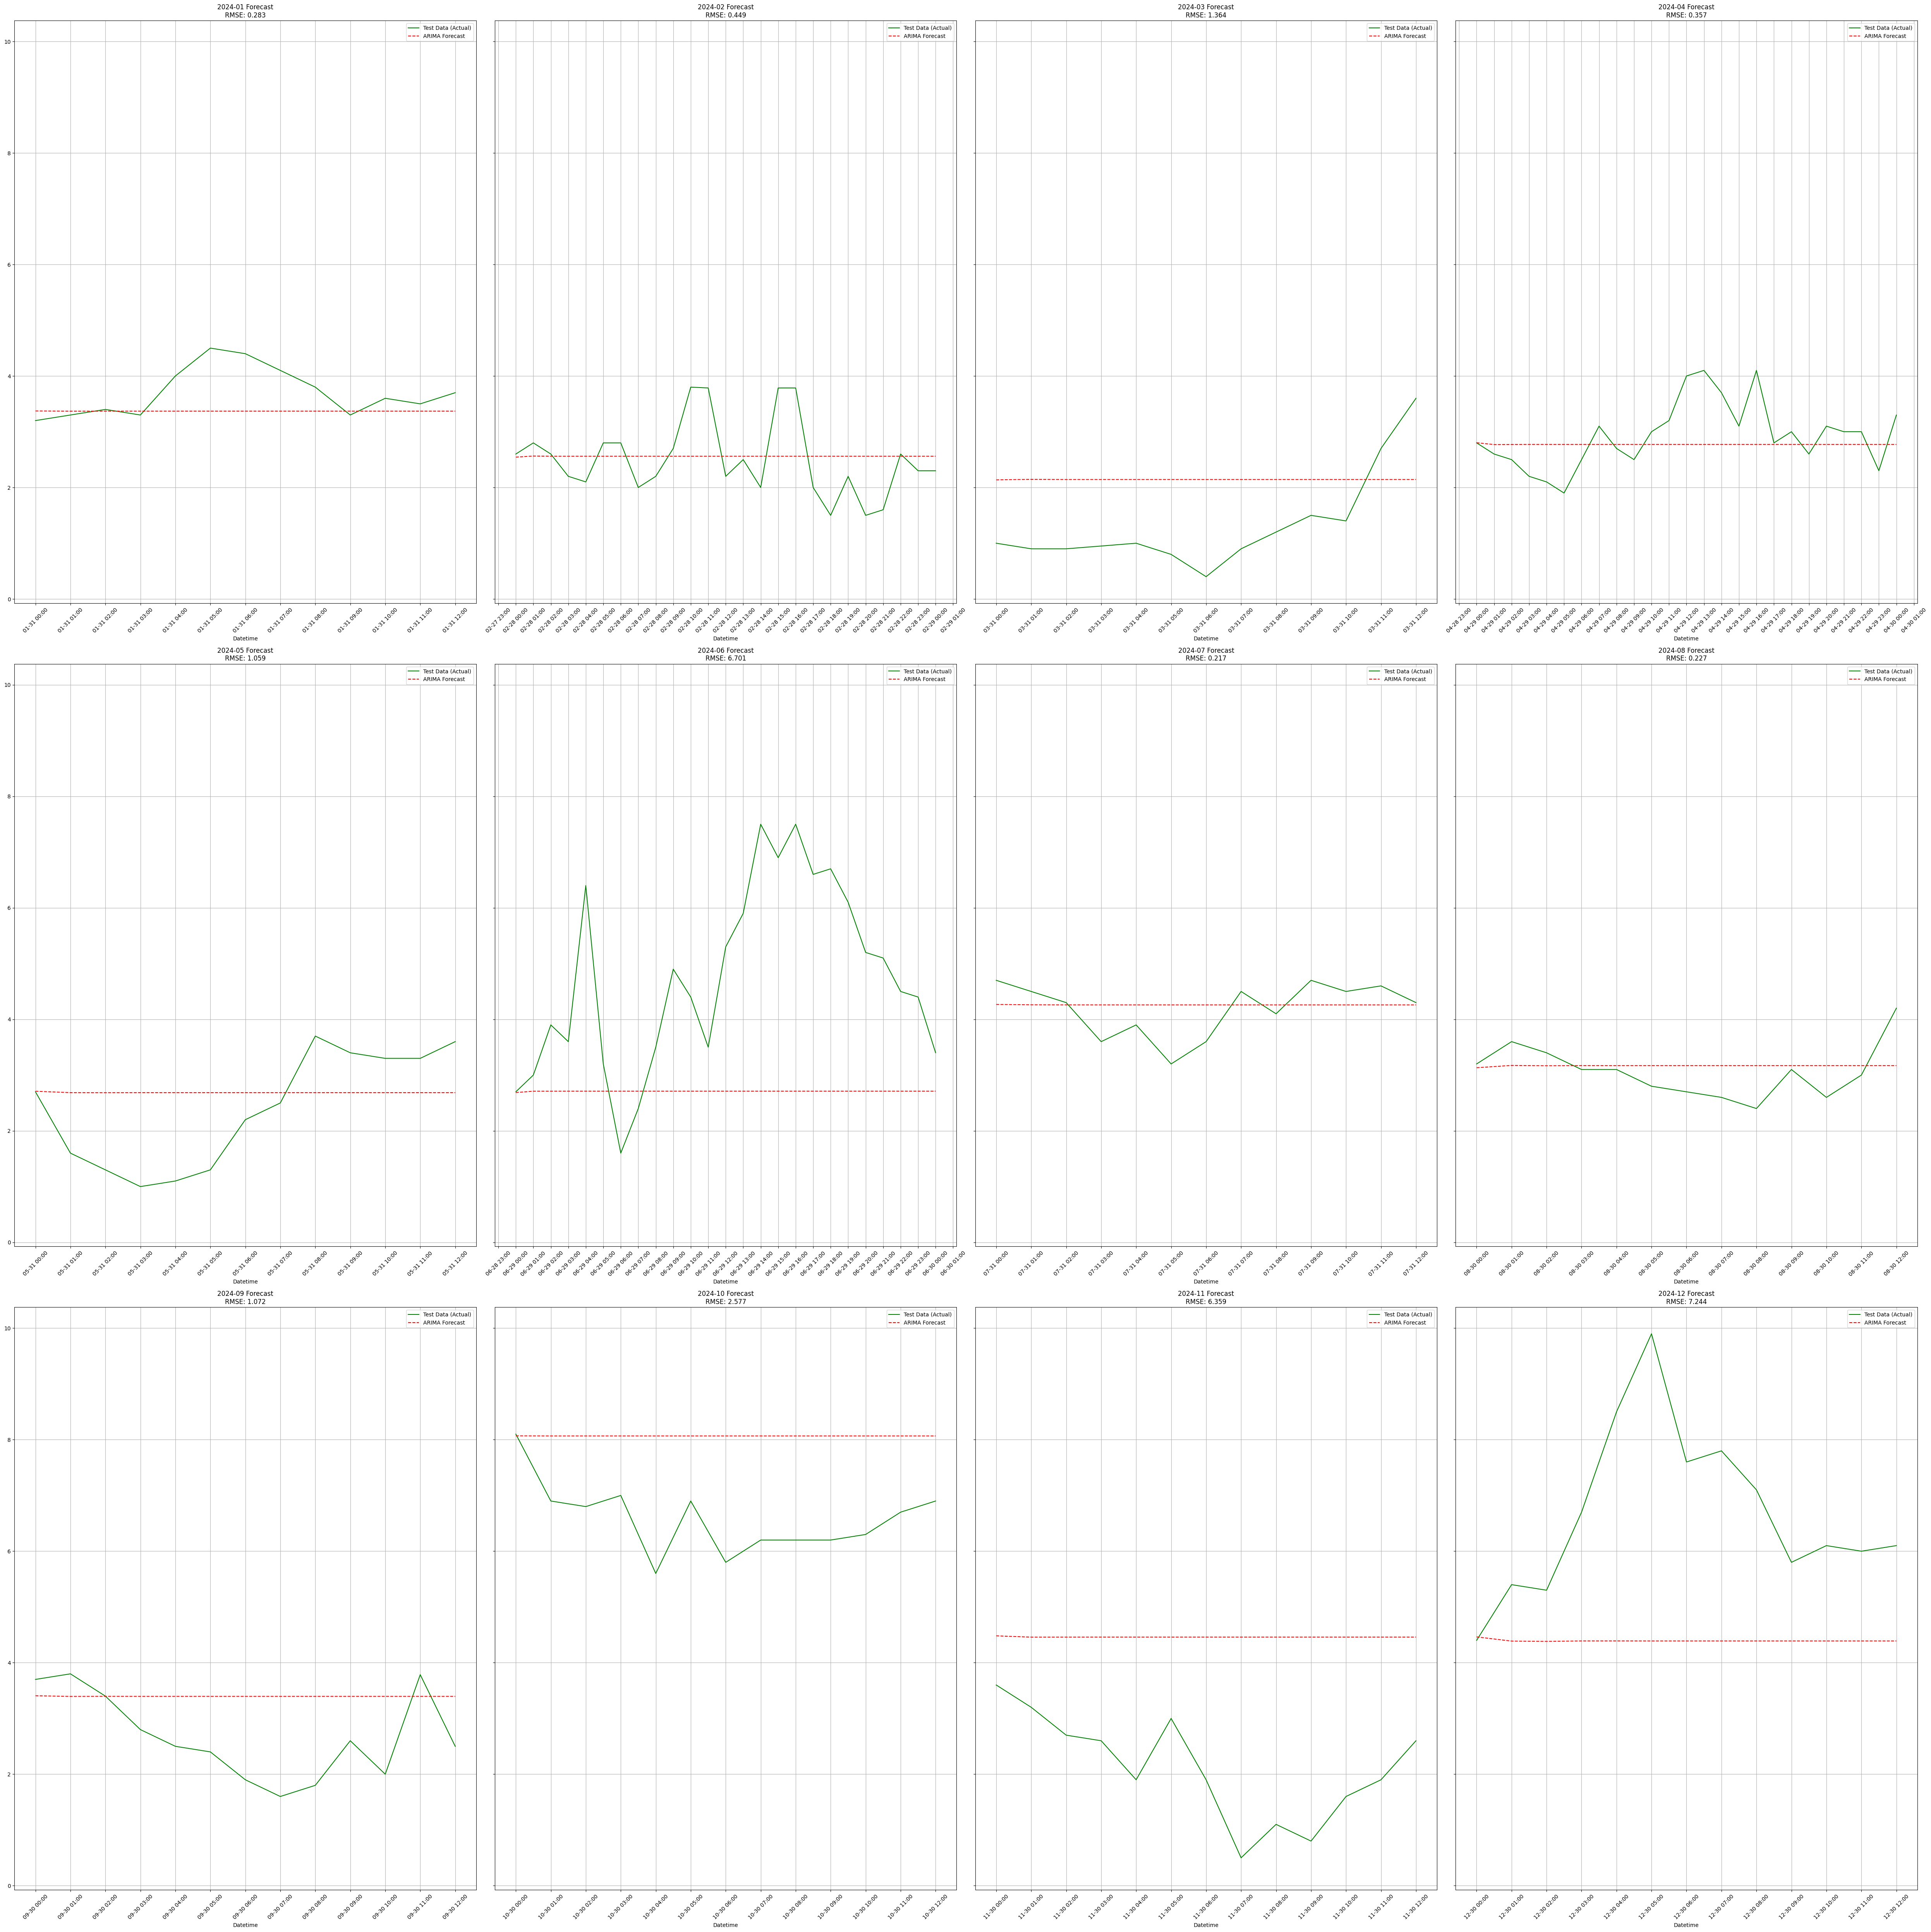

27.909706473766803


In [123]:
""" Check if there is any way to feedback the test data into the training data """




time_windows = [
    ("2024-01-02 00:00:00", "2024-01-30 23:00:00", "2024-01-31 00:00:00", "2024-01-31 12:00:00"),
    ("2024-02-01 00:00:00", "2024-02-27 23:00:00", "2024-02-28 00:00:00", "2024-02-29 12:00:00"),
    ("2024-03-01 00:00:00", "2024-03-30 23:00:00", "2024-03-31 00:00:00", "2024-03-31 12:00:00"),
    ("2024-04-01 00:00:00", "2024-04-29 00:00:00", "2024-04-29 00:00:00", "2024-04-30 12:00:00"),
    ("2024-05-01 00:00:00", "2024-05-30 23:00:00", "2024-05-31 00:00:00", "2024-05-31 12:00:00"),
    ("2024-06-01 00:00:00", "2024-06-29 00:00:00", "2024-06-29 00:00:00", "2024-06-30 12:00:00"),
    ("2024-07-01 00:00:00", "2024-07-30 23:00:00", "2024-07-31 00:00:00", "2024-07-31 12:00:00"),
    ("2024-08-01 00:00:00", "2024-08-30 00:00:00", "2024-08-30 00:00:00", "2024-08-30 12:00:00"),
    ("2024-09-01 00:00:00", "2024-09-29 23:00:00", "2024-09-30 00:00:00", "2024-09-30 12:00:00"),
    ("2024-10-01 00:00:00", "2024-10-30 00:00:00", "2024-10-30 00:00:00", "2024-10-30 12:00:00"),
    ("2024-11-01 00:00:00", "2024-11-29 23:00:00", "2024-11-30 00:00:00", "2024-11-30 12:00:00"),
    ("2024-12-01 00:00:00", "2024-12-30 00:00:00", "2024-12-30 00:00:00", "2024-12-30 12:00:00")
]

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(50, 50), sharey=True)
axes = axes.flatten()
total_error = 0

for i, (train_start, train_end, test_start, test_end) in enumerate(time_windows):
    train_data = df[(df['Datum'] >= train_start) & (df['Datum'] <= train_end)]
    train_data = train_data.set_index('Datum')['Vindhastighet medelvärde [m/s]']
    train_data = train_data.asfreq('h')

    test_data = df[(df['Datum'] >= test_start) & (df['Datum'] <= test_end)]
    test_data = test_data.set_index('Datum')['Vindhastighet medelvärde [m/s]']

    model = sm.tsa.ARIMA(train_data, order=(2, 1, 0))
    fitted_model = model.fit()
    forecast_horizon = len(test_data)
    forecast = fitted_model.forecast(steps=forecast_horizon)

    rmse = (mean_squared_error(test_data, forecast))
    total_error += rmse

    forecast_index = test_data.index
    ax = axes[i]
    ax.plot(forecast_index, test_data, label="Test Data (Actual)", color='green')
    ax.plot(forecast_index, forecast, label="ARIMA Forecast", color='red', linestyle='dashed')

    ax.set_xlabel("Datetime")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    ax.tick_params(axis='x', rotation=45)

    ax.set_title(f"{test_start[:7]} Forecast\nRMSE: {rmse:.3f}")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()
print(total_error)


# The afternoon period

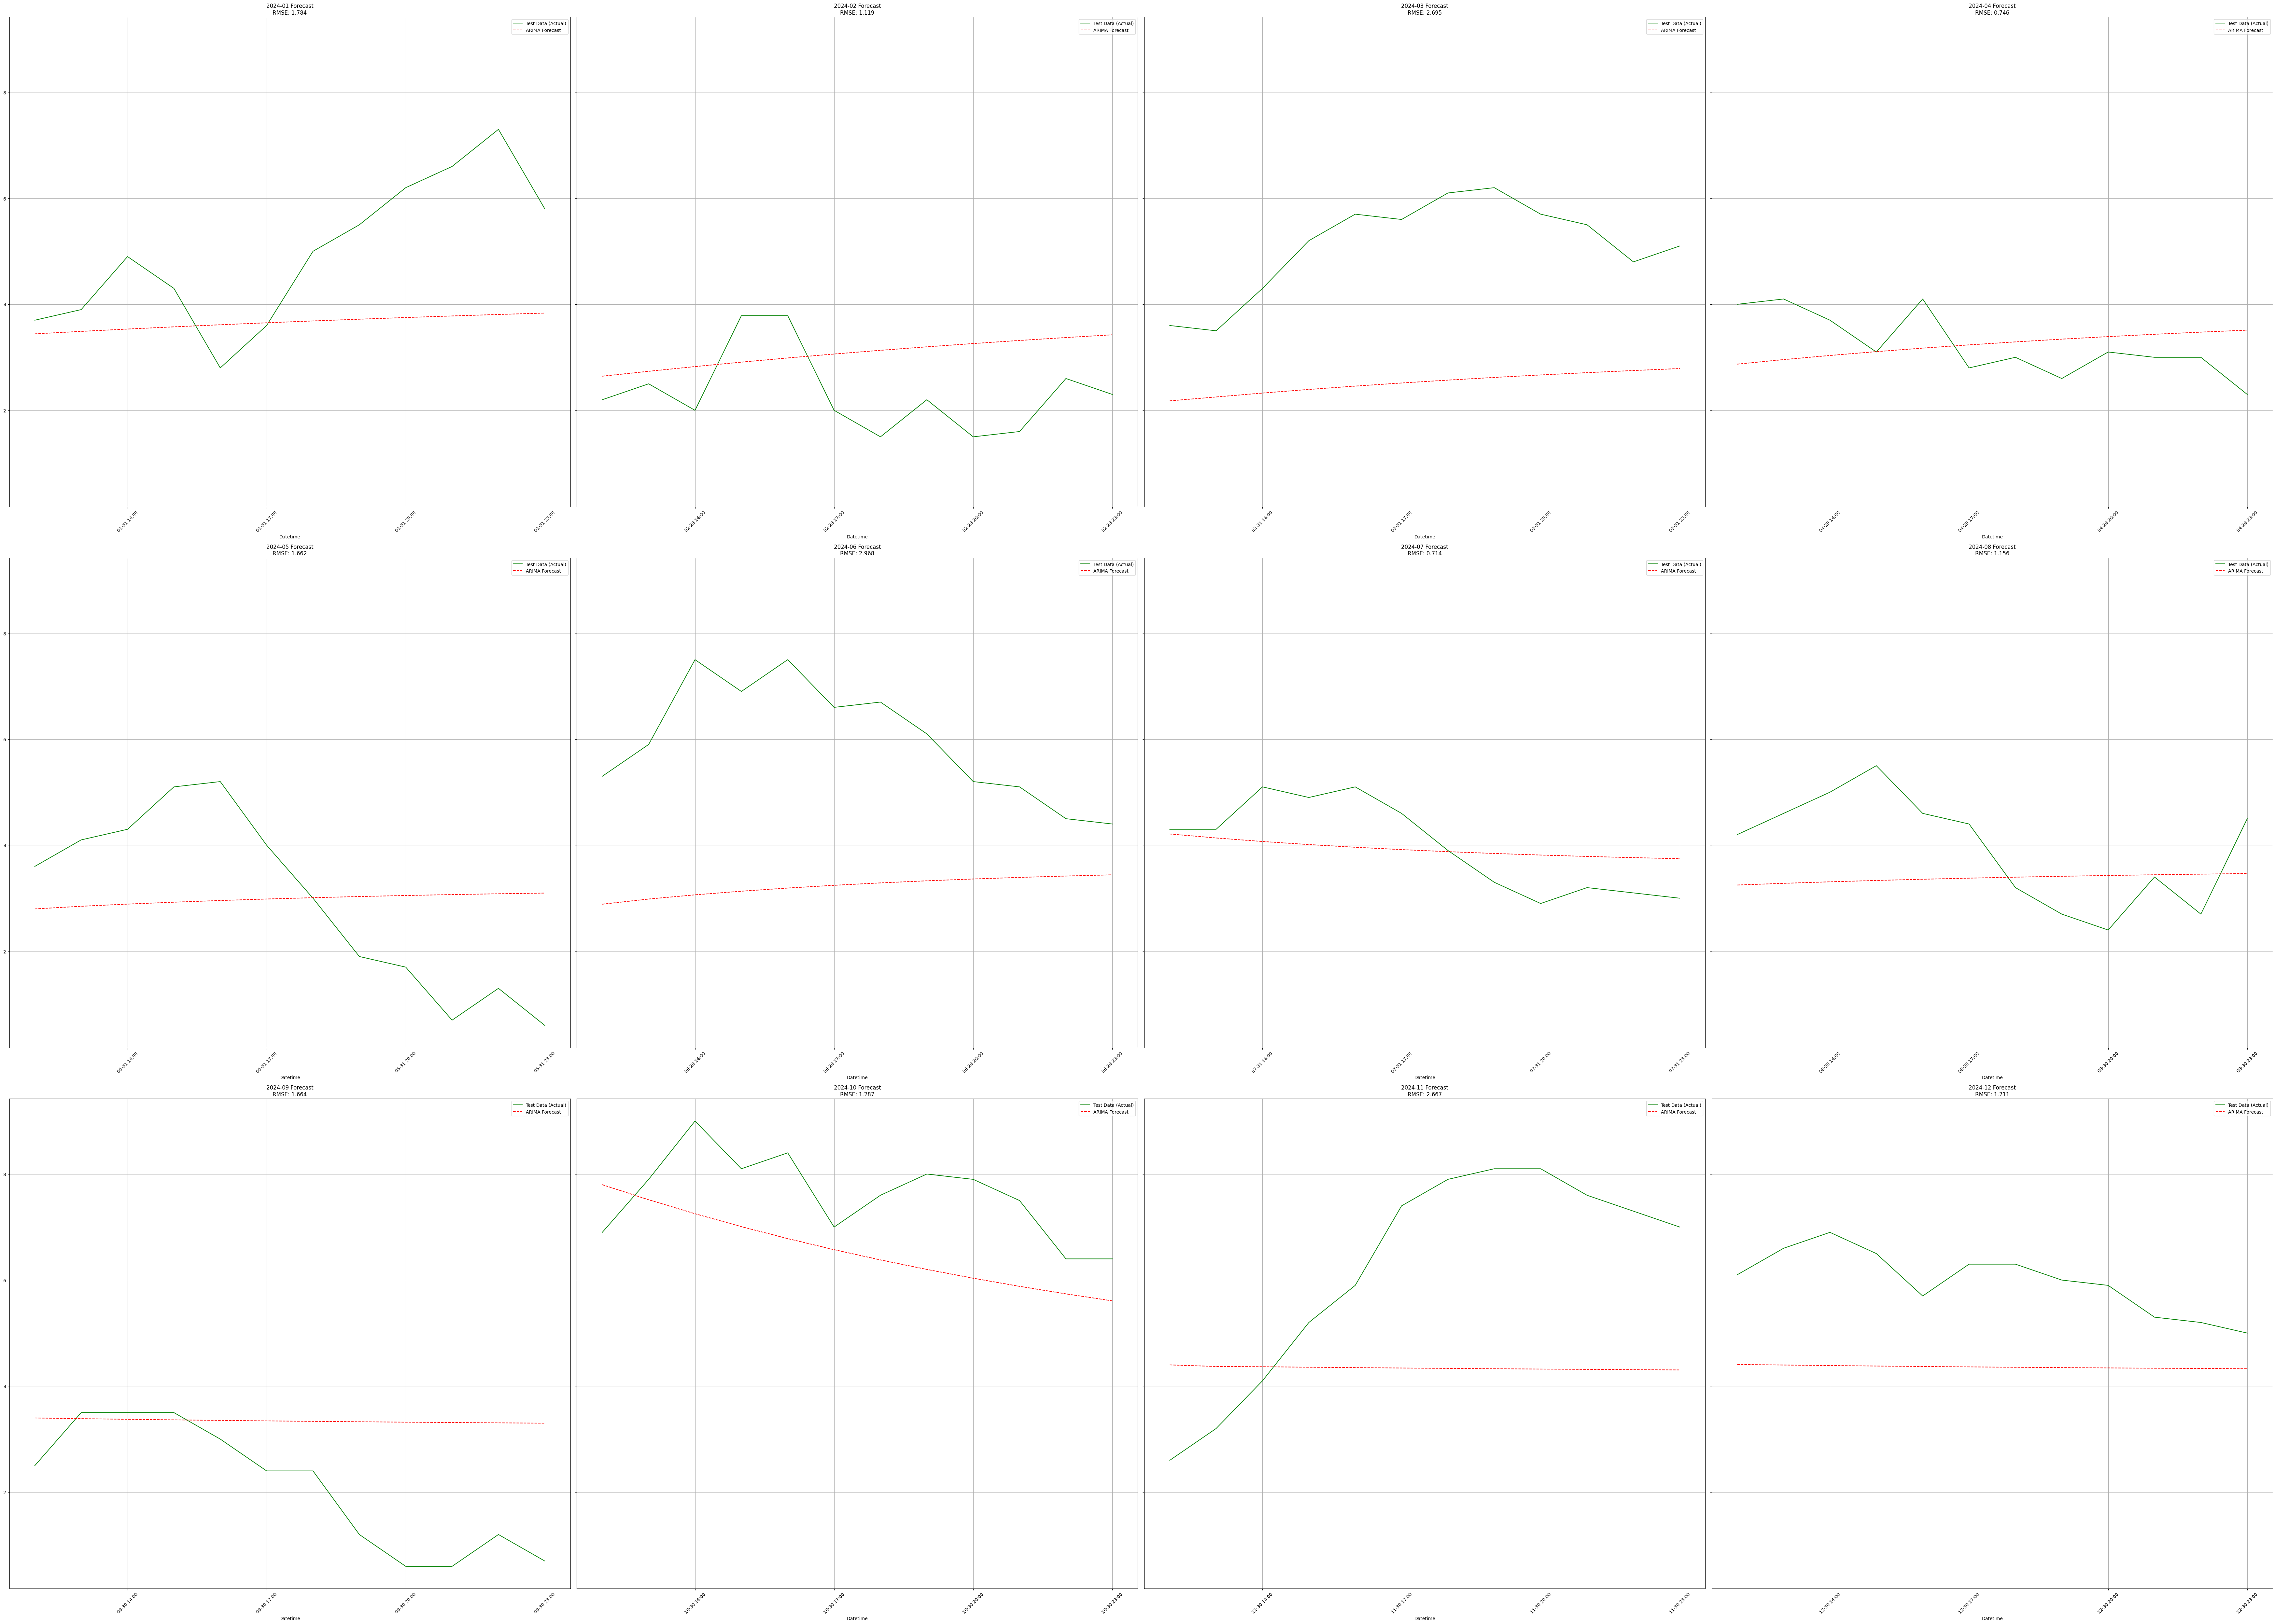

20.1741702288552


In [124]:
time_windows_night = [
    ("2024-01-02 00:00:00", "2024-01-30 23:00:00", "2024-01-31 12:00:00", "2024-01-31 23:00:00"),
    ("2024-02-01 00:00:00", "2024-02-27 23:00:00", "2024-02-28 12:00:00", "2024-02-28 23:00:00"),
    ("2024-03-01 00:00:00", "2024-03-30 23:00:00", "2024-03-31 12:00:00", "2024-03-31 23:00:00"),
    ("2024-04-01 00:00:00", "2024-04-29 00:00:00", "2024-04-29 12:00:00", "2024-04-29 23:00:00"),
    ("2024-05-01 00:00:00", "2024-05-30 23:00:00", "2024-05-31 12:00:00", "2024-05-31 23:00:00"),
    ("2024-06-01 00:00:00", "2024-06-29 00:00:00", "2024-06-29 12:00:00", "2024-06-29 23:00:00"),
    ("2024-07-01 00:00:00", "2024-07-30 23:00:00", "2024-07-31 12:00:00", "2024-07-31 23:00:00"),
    ("2024-08-01 00:00:00", "2024-08-30 00:00:00", "2024-08-30 12:00:00", "2024-08-30 23:00:00"),
    ("2024-09-01 00:00:00", "2024-09-29 23:00:00", "2024-09-30 12:00:00", "2024-09-30 23:00:00"),
    ("2024-10-01 00:00:00", "2024-10-30 00:00:00", "2024-10-30 12:00:00", "2024-10-30 23:00:00"),
    ("2024-11-01 00:00:00", "2024-11-29 23:00:00", "2024-11-30 12:00:00", "2024-11-30 23:00:00"),
    ("2024-12-01 00:00:00", "2024-12-30 00:00:00", "2024-12-30 12:00:00", "2024-12-30 23:00:00")
]

total_error = 0
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(70, 50), sharey=True)
axes = axes.flatten()

for i, (train_start, train_end, test_start, test_end) in enumerate(time_windows_night):
    train_data = df[(df['Datum'] >= train_start) & (df['Datum'] <= train_end)]
    train_data = train_data.set_index('Datum')['Vindhastighet medelvärde [m/s]']
    train_data = train_data.asfreq('h')

    test_data = df[(df['Datum'] >= test_start) & (df['Datum'] <= test_end)]
    test_data = test_data.set_index('Datum')['Vindhastighet medelvärde [m/s]']

    model = sm.tsa.ARIMA(train_data, order=(2, 0, 0))
    fitted_model = model.fit()

    forecast_horizon = len(test_data)
    forecast = fitted_model.forecast(steps=forecast_horizon)

    rmse = np.sqrt(mean_squared_error(test_data, forecast))
    total_error += rmse

    forecast_index = test_data.index
    ax = axes[i]
    ax.plot(forecast_index, test_data, label="Test Data (Actual)", color='green')
    ax.plot(forecast_index, forecast, label="ARIMA Forecast", color='red', linestyle='dashed')

    ax.set_xlabel("Datetime")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=3))
    ax.tick_params(axis='x', rotation=45)

    ax.set_title(f"{test_start[:7]} Forecast\nRMSE: {rmse:.3f}")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()
print(total_error)

Installing modules

# Hyperparameter tuning?

Arima(d,p,q)

In [125]:
print(df.isna().sum())  # Should print 0 for all columns


År                                              0
Månad                                           0
Dag                                             0
Daggpunktstemperatur medelvärde [°C]            0
Lufttemperatur medelvärde [°C]                  0
Molnighet [1/8]                                 0
Lufttryck medelvärde [hPa]                      0
Relativ luftfuktighet medelvärde [%]            0
Nederbördsmängd medelvärde [mm]                 0
Snödjup medelvärde [cm]                         0
Vindriktning medelvärde [°]                     0
Byvindshastighet medelvärde [m/s]               0
Vindhastighet medelvärde [m/s]                  0
Datum                                           0
Hour_of_day                                     0
Daggpunktstemperatur medelvärde [°C] for t+1    0
Lufttemperatur medelvärde [°C] for t+1          0
Lufttryck medelvärde [hPa] for t+1              0
Relativ luftfuktighet medelvärde [%] for t+1    0
Nederbördsmängd medelvärde [mm] for t+1         0


#TEST

In [126]:
df['Datum'].info()

<class 'pandas.core.series.Series'>
Index: 8637 entries, 0 to 8637
Series name: Datum
Non-Null Count  Dtype         
--------------  -----         
8637 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 135.0 KB


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima

# ✅ 1. Prepare datetime and fix index
df['Datum'] = pd.to_datetime(df['Datum'])     # Ensure datetime format
df = df.set_index('Datum')                    # Set as index
df = df.asfreq('h')                           # Set fixed hourly frequency

# ✅ 2. Handle any NaNs created by asfreq (in case of missing timestamps)
df = df.fillna(method='ffill')  # Or use interpolate if preferred

# ✅ 3. Split data into train/test (80%/20%)
train_size = int(len(df) * 0.8)

train_data = df.iloc[:train_size]['Vindhastighet medelvärde [m/s]']
test_data = df.iloc[train_size:]['Vindhastighet medelvärde [m/s]']

# ✅ 4. Run Auto-SARIMA
seasonal_period = 24  # daily seasonality for hourly data

best_sarima = auto_arima(train_data,
                         seasonal=True,
                         m=seasonal_period,
                         stepwise=True,
                         trace=True,
                         suppress_warnings=True)

# ✅ 5. Extract best order and seasonal order
p, d, q = best_sarima.order
P, D, Q, m = best_sarima.seasonal_order

print(f"Best SARIMA order: ({p}, {d}, {q}) x ({P}, {D}, {Q}, {m})")

# ✅ 6. Refit best model on train data using statsmodels
model = sm.tsa.SARIMAX(train_data,
                       order=(p, d, q),
                       seasonal_order=(P, D, Q, m))
best_model = model.fit()

# ✅ 7. Forecast
forecast_horizon = len(test_data)
forecast = best_model.forecast(steps=forecast_horizon)

# ✅ 8. Evaluate forecast with RMSE
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print(f"RMSE: {rmse:.3f}")

# ✅ 9. Plot actual vs forecast
plt.figure(figsize=(14, 6))

plt.plot(test_data.index, test_data, label="Test Data (Actual)", color='green')
plt.plot(test_data.index, forecast, label="SARIMA Forecast", color='red', linestyle='dashed')

plt.xlabel("Datetime")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"SARIMA Forecast vs. Actual (Last 20%)\nOrder: ({p},{d},{q}) x ({P},{D},{Q},{m}) | RMSE: {rmse:.3f}")
plt.legend()
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.grid(True)

plt.tight_layout()
plt.show()


# Hyper parameter tuning for the SARIMA version

## Seasonal ARIMA model implementation: